## Las Losowy

Las losowy to algorytm uczenia maszynowego klasyfikacji i regresji, składający się z **wielu drzew decyzyjnych**. Algorytm ten należy do grupy metod **ensemble learning (uczenie zespołowe)**, które poprzez połączenie wielu modeli uzyskują wyższą dokładność niż pojedyncze modele.

Idea lasu losowego polega na tym, że każde pojedyncze drzewo decyzyjne uczy się na **losowej podzbiorze cech** i **losowym podzbiorze danych treningowych**. Następnie wyniki predykcji z wielu drzew są agregowane, aby uzyskać ostateczną predykcję. Dzięki temu las losowy jest odporny na przeuczenie (overfitting) i charakteryzuje się wysoką zdolnością do generalizacji.

## Zalety Lasu Losowego

1. **Wysoka dokładność**: Łączenie wielu drzew decyzyjnych pozwala na uzyskanie wysokiej dokładności klasyfikacji i regresji.
2. **Odporność na przeuczenioe**: Losowy dobór cech i próbek treningowych ogranicza tendencję do przeregulowania.
3. **Automatyczny dobór cech**: Las losowy sam dokonuje selekcji istotnych cech.
4. **Odporność na szum i dane odstające**: Jest odporny na szum w danych i wartości odstające.
5. Jest również całkiem dobrym wskaźnikiem ważności cech.

## Algorytm Lasu Losowego

Proces tworzenia lasu losowego można podsumować w następujących krokach:

1. **Bootstrapping**: Z oryginalnego zbioru danych treningowych tworzone są losowe podzbiory (bootstrap samples) o tej samej wielkości.
2. **Budowa drzew**: Dla każdego podzbioru danych treningowych budowane jest pojedyncze drzewo decyzyjne. Przy budowie każdego drzewa losowany jest podzbiór cech, z których drzewo może dokonywać podziałów.
3. **Agregacja predykcji**: Predykcje wszystkich drzew są agregowane, np. poprzez głosowanie większościowe (w klasyfikacji) lub uśrednienie (w regresji), aby uzyskać ostateczną predykcję.

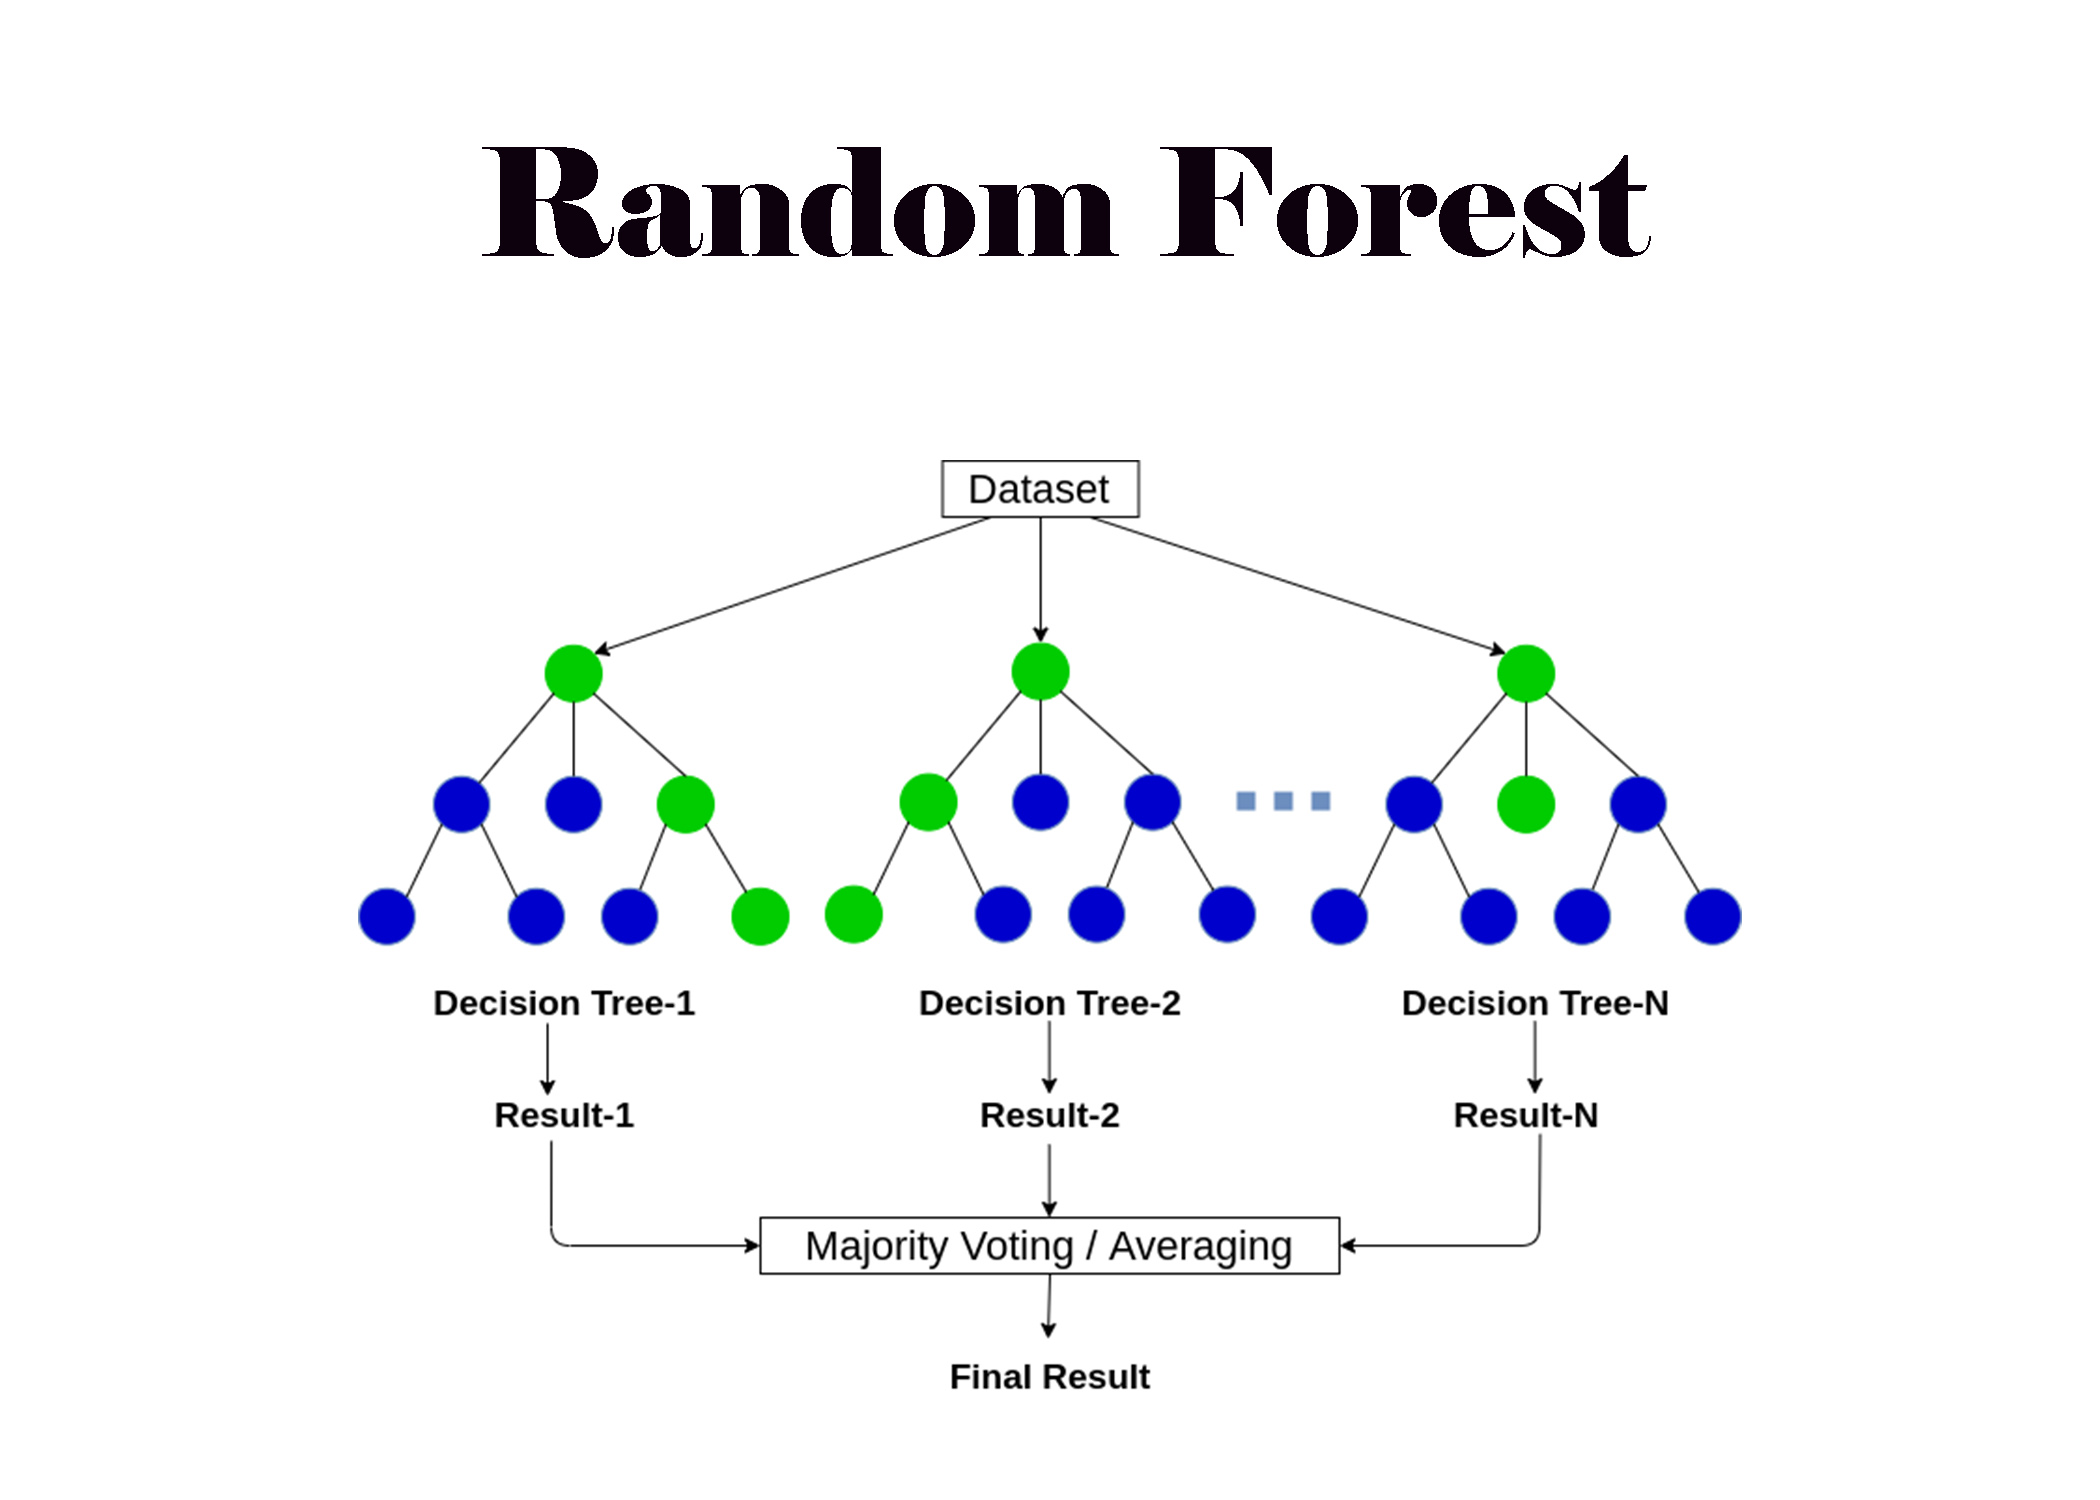

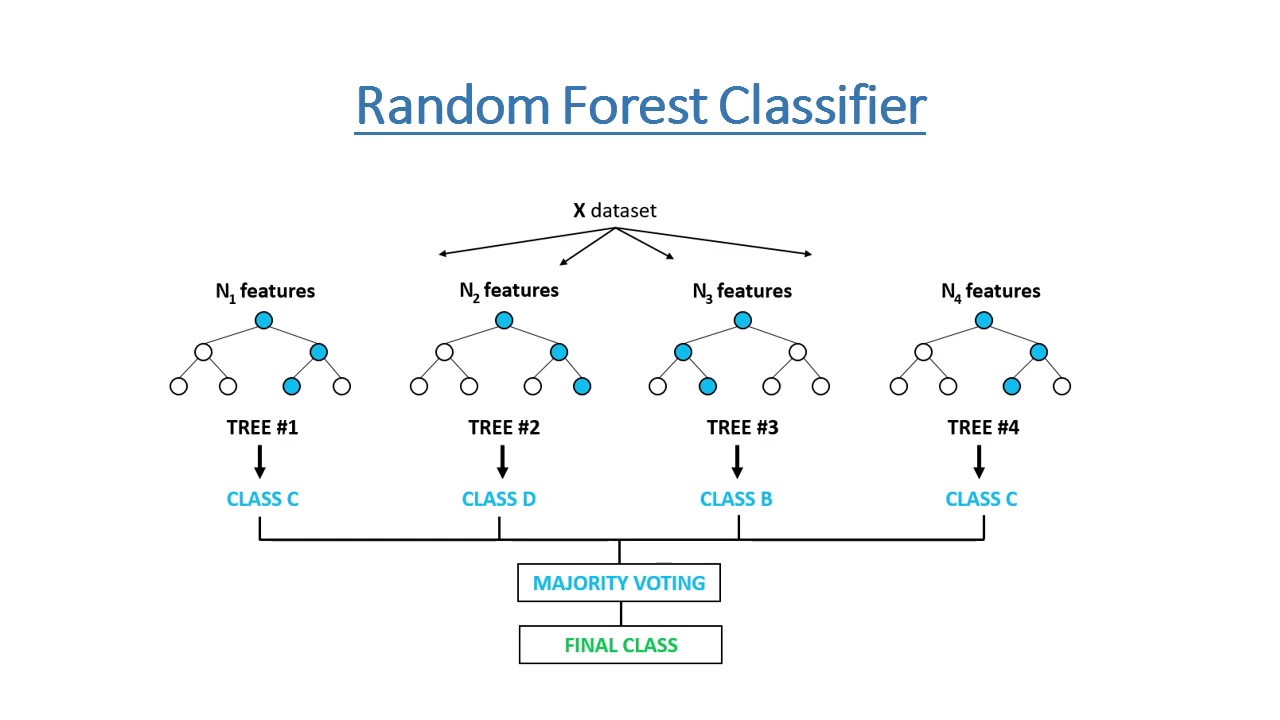

## Intuicja algorytmu lasu losowego

Intuicja algorytmu lasu losowego może być podzielona na dwa etapy.

### Pierwszy etap

W pierwszym etapie losowo wybieramy „k” cech spośród łącznej liczby „m” cech i budujemy las losowy. W pierwszym etapie postępujemy w następujący sposób:

1. Losowo wybierz k cech z łącznej liczby m cech, gdzie k < m.
2. Wśród k cech oblicz punkt podziału d, korzystając z najlepszego punktu podziału.
3. Podziel węzeł na węzły potomne, korzystając z najlepszego podziału.
4. Powtarzaj kroki 1-3, aż osiągniesz l liczbę węzłów.
5. Zbuduj las, powtarzając kroki 1-4 n razy, aby stworzyć n drzew.

### Drugi etap

W drugim etapie dokonujemy predykcji, korzystając z wytrenowanego algorytmu lasu losowego.

1. Bierzemy cechy testowe i używamy reguł każdego losowo utworzonego drzewa decyzyjnego do przewidywania wyniku i zapisujemy przewidywany wynik.
2. Następnie obliczamy głosy dla każdego przewidywanego celu.
3. Na koniec uznajemy cel z najwyższą liczbą głosów za ostateczną predykcję algorytmu lasu losowego.

In [82]:
?RandomForestClassifier

In [68]:
# import random

In [81]:

# random.seed(42)
# Losowanie 6 unikalnych liczb z zakresu 1–50
# random_numbers = random.sample(range(1, 49), 6)
# print("Wylosowane liczby:", random_numbers)

Wylosowane liczby: [6, 36, 19, 41, 40, 24]


In [36]:
import time

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
start_time = time.time()
X, y = make_classification(n_samples=1000, n_features=1000, n_informative=5, 
                           n_redundant=2, n_classes=2, random_state=20241127)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf = RandomForestClassifier(
    n_estimators=100,        # Liczba drzew w lesie
    max_depth=None,          # Maksymalna głębokość drzew
    min_samples_split=2,     # Minimalna liczba próbek wymagana do podziału węzła
    min_samples_leaf=1,      # Minimalna liczba próbek w liściu
    max_features='sqrt',     # Liczba cech rozważanych przy szukaniu najlepszego podziału
    random_state=42          # Losowy stan początkowy
)

rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print(f'Dokładność na zbiorze testowym: {accuracy:.2f}')

end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania skryptu: {execution_time:.4f} sekundy")

Dokładność na zbiorze testowym: 0.66
Czas wykonania skryptu: 1.6670 sekundy


In [2]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
accuracy = tree.score(X_test, y_test)
accuracy

0.91

1. `n_estimators`: Liczba drzew decyzyjnych w lesie. Zwiększanie tej wartości zazwyczaj poprawia dokładność, ale jednocześnie zwiększa złożoność obliczeniową.

2. `max_depth`: Maksymalna głębokość każdego drzewa decyzyjnego. Wyższa wartość pozwala na bardziej skomplikowane drzewa, ale może prowadzić do przeregulowania.

3. `min_samples_split`: Minimalna liczba próbek wymagana do podziału węzła wewnętrznego. Wyższa wartość zapobiega przeregulowaniu.

4. `min_samples_leaf`: Minimalna liczba próbek wymagana w liściu. Podobnie jak powyżej, wyższa wartość ogranicza przeregulowanie.

5. `max_features`: Liczba cech rozważanych przy szukaniu najlepszego podziału w każdym węźle. Wartość 'sqrt' oznacza, że przy każdym podziale będzie rozważanych sqrt(n_features) cech.

6. `random_state`: Ustawia losowy stan początkowy, aby zapewnić powtarzalność wyników.

In [83]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=2, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid_search = RandomizedSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

print(f"Dokładność na zbiorze testowym: {best_model.score(X_test, y_test):.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Najlepsze parametry: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.94      0.94      0.94        88

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Dokładność na zbiorze testowym: 0.9500


1. Definiujemy bazowy model `RandomForestClassifier`.

2. Tworzymy siatkę parametrów `param_grid`, która zawiera różne wartości dla kluczowych hiperparametrów.

3. Inicjalizujemy `GridSearchCV`, który będzie systematycznie przeszukiwał wszystkie kombinacje parametrów.

4. Używamy 5-krotnej walidacji krzyżowej (`cv=5`).

5. Ustawiamy `n_jobs=-1`, co oznacza wykorzystanie wszystkich dostępnych rdzeni procesora do przyspieszenia obliczeń.

6. Po dopasowaniu, wyświetlamy najlepsze znalezione parametry.

7. Używamy najlepszego modelu do predykcji na zbiorze testowym i wyświetlamy raport klasyfikacji.

Kilka uwag:

- Grid search może być czasochłonny, szczególnie dla dużych zbiorów danych i szerokiej siatki parametrów.
- Możesz rozważyć użycie `RandomizedSearchCV` zamiast `GridSearchCV`, jeśli chcesz przeszukać większą przestrzeń parametrów w krótszym czasie.

### feature_importances

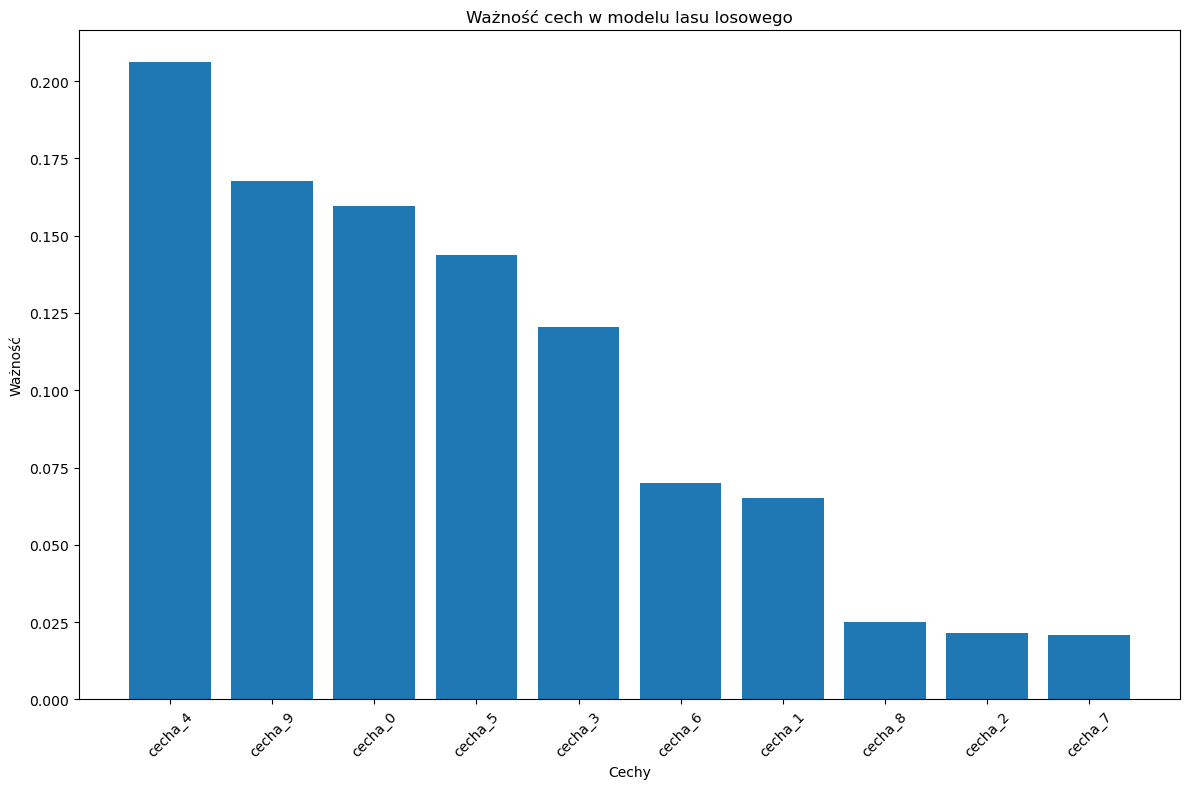

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, 
                           n_redundant=2, n_classes=2, random_state=42)


feature_names = [f'cecha_{i}' for i in range(X.shape[1])]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Pobranie ważności cech
importances = rf.feature_importances_

# Sortowanie cech według ważności
indices = np.argsort(importances)[::-1]

# Wykres
plt.figure(figsize=(12, 8))
plt.title("Ważność cech w modelu lasu losowego")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Cechy")
plt.ylabel("Ważność")
plt.tight_layout()


plt.show()

## Jak działa ważność cech w lesie losowym?

Ważność cech w lesie losowym to miara, która pokazuje, jak bardzo dana cecha wpływa na decyzje podejmowane przez model.

1. **Budowa drzew**:
   - Las losowy składa się z wielu drzew decyzyjnych.
   - Każde drzewo jest budowane na podstawie losowej próbki danych i cech.

2. **Podejmowanie decyzji**:
   - W każdym węźle drzewa algorytm wybiera cechę, która najlepiej dzieli dane.
   - Ta "najlepsza" cecha to ta, która prowadzi do największego zmniejszenia niepewności (np. entropii lub zanieczyszczenia Giniego) w danych.

3. **Zliczanie użycia cech**:
   - Za każdym razem, gdy cecha jest używana do podziału w drzewie, algorytm zapisuje, o ile zmniejszyła się niepewność dzięki temu podziałowi.
   - Im większe zmniejszenie niepewności, tym ważniejsza jest ta cecha dla tego konkretnego podziału.

4. **Agregacja wyników**:
   - Po zbudowaniu wszystkich drzew, algorytm sumuje wszystkie "punkty" zdobyte przez każdą cechę we wszystkich drzewach.
   - Następnie normalizuje te sumy, aby dać każdej cesze wartość ważności od 0 do 1.



Praktyczne zastosowania:
- Selekcja cech: Możemy wybrać najważniejsze cechy do budowy prostszego modelu.
- Zrozumienie danych: Pomaga zrozumieć, które cechy mają największy wpływ na predykcje.

## Zalety i wady algorytmu lasu losowego

### Zalety algorytmu lasu losowego

- Algorytm lasu losowego może być używany do rozwiązywania zarówno problemów klasyfikacji, jak i regresji.
- Uważany jest za bardzo dokładny i odporny model, ponieważ wykorzystuje dużą liczbę drzew decyzyjnych do dokonywania predykcji.
- Las losowy bierze średnią wszystkich predykcji dokonanych przez drzewa decyzyjne, co znosi obciążenia. Dlatego nie cierpi na problem przeuczenia.
- Klasyfikator lasu losowego może radzić sobie z brakującymi wartościami. Istnieją dwa sposoby radzenia sobie z brakującymi wartościami. Pierwszym jest użycie wartości mediany do zastąpienia zmiennych ciągłych, a drugim jest obliczenie średniej ważonej bliskością brakujących wartości.
- Klasyfikator lasu losowego może być używany do selekcji cech. Oznacza to wybór najważniejszych cech spośród dostępnych cech z zestawu danych treningowych.

### Wady algorytmu lasu losowego

- Największą wadą lasów losowych jest ich złożoność obliczeniowa. Las losowy jest bardzo wolny w dokonywaniu predykcji, ponieważ do dokonywania predykcji używana jest duża liczba drzew decyzyjnych. Wszystkie drzewa w lesie muszą dokonać predykcji dla tego samego wejścia, a następnie przeprowadzić głosowanie. Jest to więc czasochłonny proces.
- Model jest trudniejszy do interpretacji w porównaniu z pojedynczym drzewem decyzyjnym, gdzie możemy łatwo dokonać predykcji.